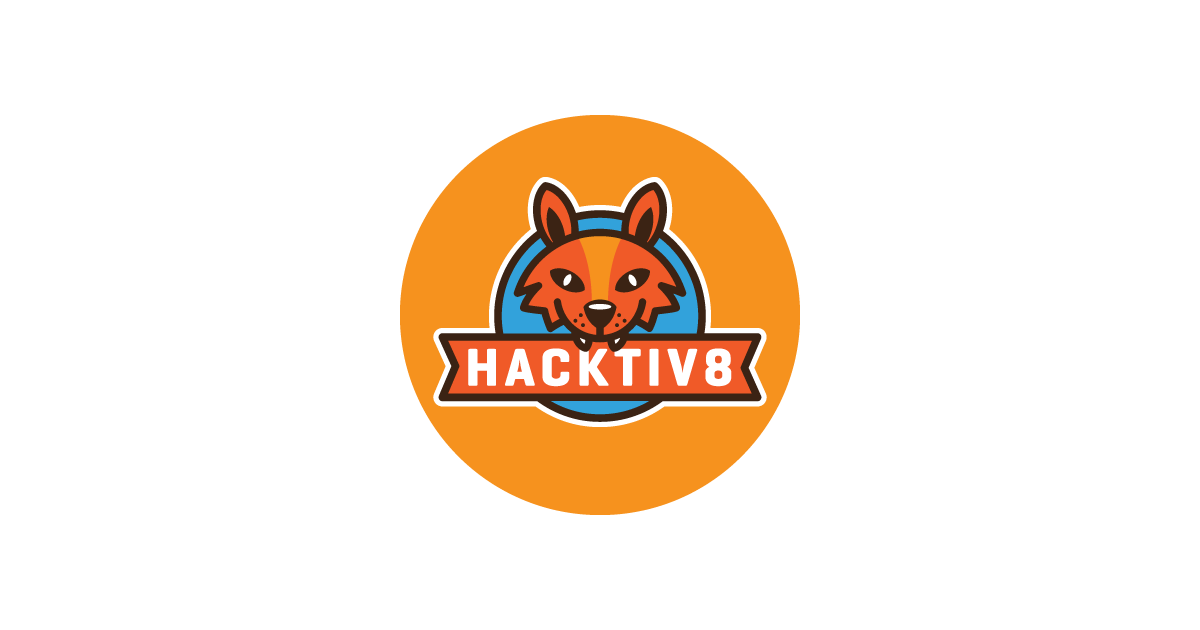
## Perkenalan

* Oleh:
1. Muhammad Rofi Ariansyah (PYTN - KS17 - 05)
2. Lathif Nur Irsyad (PYTN - KS17 - 07)
3. Anita bae (PYTN - KS17 - 09)

Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet dan obesitas yang tidak sehat, aktivitas fisik dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi. Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidaemia atau penyakit yang sudah mapan) memerlukan deteksi dini dan manajemen di mana model pembelajaran mesin dapat sangat membantu.

Dataset ini terdiri dari 13 atribut dengan 299 rows. Dalam kasus ini target dari hasil prediksi keselamatan pasien dari penyakit jantung adalah death_event atau kematian.

* Age: Umur Pasien
* Anaemia: Apakah Ada Pengurangan Haemoglobin
* Creatinine_phosphokinase: Level Enzim CPK Dalam Mcg/L
* Diabetes: Apakah Pasien Punya Riwayat Diabetes
* Ejection_fraction: Persentase Darah Yang Meninggalkan Jantung Dalam Persentasi * Di Setiap Kontraksi Jantung
* High_blood_pressure: Apakah Pasien Punya Darah Tinggi
* Platelets: Jumlah Platelet Di Darah Dalam Kiloplatelets/ML
* Serum_creatinine: Level Serum Creatinine Di Darah Dalam Mg/DL
* Serum_sodium: Level Serum Sodium Di Darah Dalam MEq/L
* Sex: Apakah Pasien Pria Atau Wanita
* Smoking: Apakah Pasien Merokok
* Time: Waktu Dalam Hari Untuk Follow-Up
* death_event: Apakah Pasien Sudah Meninggal Saat Waktu Follow-Up

## Import Pustaka

In [1]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
#Library For DataFrame
import pandas as pd
import numpy as np

#Library For datetime
import datetime
import calendar

#Library for Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

# Library for analysis
import scipy
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error,mean_absolute_error,median_absolute_error,mean_squared_error,r2_score
import pickle
import joblib as jb
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
path = '/content/heart_failure_clinical_records_dataset.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.shape

(299, 13)

## Data Cleaning

In [ ]:
#Melihat keberadaan kolom data apakah ada yang kosong atau tidak
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [ ]:
#Menjumlahkan atribut yang kosong
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# mengecek apakah terdapat duplikasi data
df.duplicated().sum()

0

## Eksplorari Data

In [ ]:
#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Berdasarkan hasil describe diatas, dapat disimpulkan bahwa:
1. Age
Rata-rata Usia pada Pasien Penyakit Jantung yakni kisaran 60 tahun, usia terendah berada pada umur 40 Tahun dan Usia tertinggi berada pada umur 95 Tahun

2. Anaemia
Rata-rata nilai Anemia pada Pasien Penyakit Jantung berada di 0.431438, untuk nilai terendah di 0 dan nilai tertinggi berada di 1.0

3. creatinine_phosphokinase
Rata-rata creatinine_phosphokinase pada Pasien Penyakit Jantung berada di 581.839465, nilai terendah berada di 23.00 dan nilai tertinggi berada di 7861.00

4. diabetes
Rata-rata nilai Diabetes pada Pasien Penyakit Jantung berada di 0.418060, untuk nilai terendah ada di 0 dan nilai tertinggi berada di angka 1.

5. ejection_fraction
Rata-rata ejection_fraction pada Pasien Penyakit Jantung berada di 38.083612, nilai terendah berada di 14.00 dan nilai tertinggi berada di 80.00

dst..

0    203
1     96
Name: DEATH_EVENT, dtype: int64


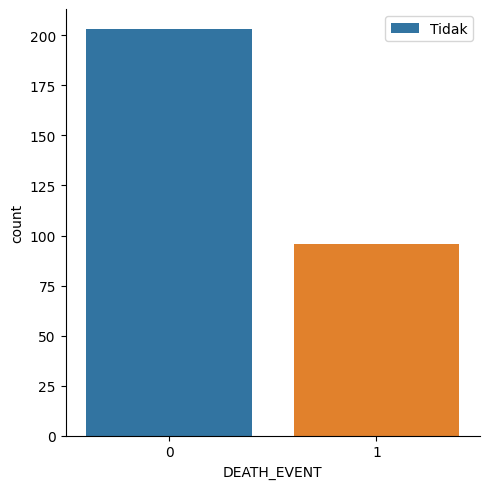

In [ ]:
# Mengecek jumlah kematian pada pasien dengan barchart
print(df['DEATH_EVENT'].value_counts())
sns.catplot(x = 'DEATH_EVENT', kind = 'count', data = df)
plt.legend(labels=["Tidak","Legend_Day2"])

<Axes: ylabel='DEATH_EVENT'>

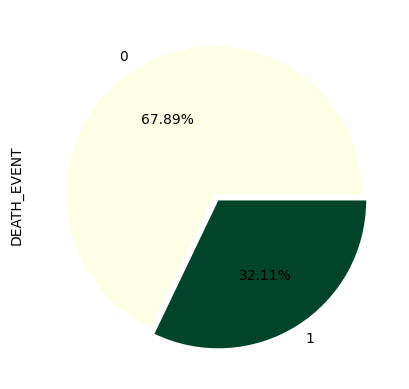

In [ ]:
# Menampilkan jumlah kematian dalam bentuk pie chart, untuk melihat presentasenya
df['DEATH_EVENT'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    explode=[0,0.05],
    cmap='YlGn',
    shadow=False,
)

Dari kedua visualisasi diatas, jumlah pasien yang tidak meninggal lebih tinggi daripada jumlah pasien yang meninggal. Jika dilihat dari bentuk visualisasi pie chart, jumlah yang tidak meninggal ada sekitar 67,89% dan untuk pasien yang meninggal sekitar 32,11%. Jumlah perbedaannya cukup terlihat signifikan dan menyebabkan data ini menjadi imbalanced

In [ ]:
# Jumlah penderita Anemia
anemia=len(df[df['anaemia']==1])
not_anemia=len(df[df['anaemia']==0])

# Jumlah penderita Diabetes
diabet=len(df[df['diabetes']==1])
not_diabet=len(df[df['diabetes']==0])

# Jumlah penderita Darah Tinggi
hypertensi=len(df[df['high_blood_pressure']==1])
not_hypertensi=len(df[df['high_blood_pressure']==0])

# Jumlah pasien yang merokok
smok=len(df[df['smoking']==1])
not_smok=len(df[df['smoking']==0])





# Membuat dataframe dari jumlah penderita anemia dan high_blood_pressure
adhs = pd.DataFrame({'Keterangan': ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking'],
                         'No':[not_anemia, not_diabet, not_hypertensi, not_smok],
                         'Yes':[anemia, diabet, hypertensi, smok]})

adhs = adhs.set_index('Keterangan')
adhs

,No,Yes
Keterangan,,
anaemia,170,129
diabetes,174,125
high_blood_pressure,194,105
smoking,203,96


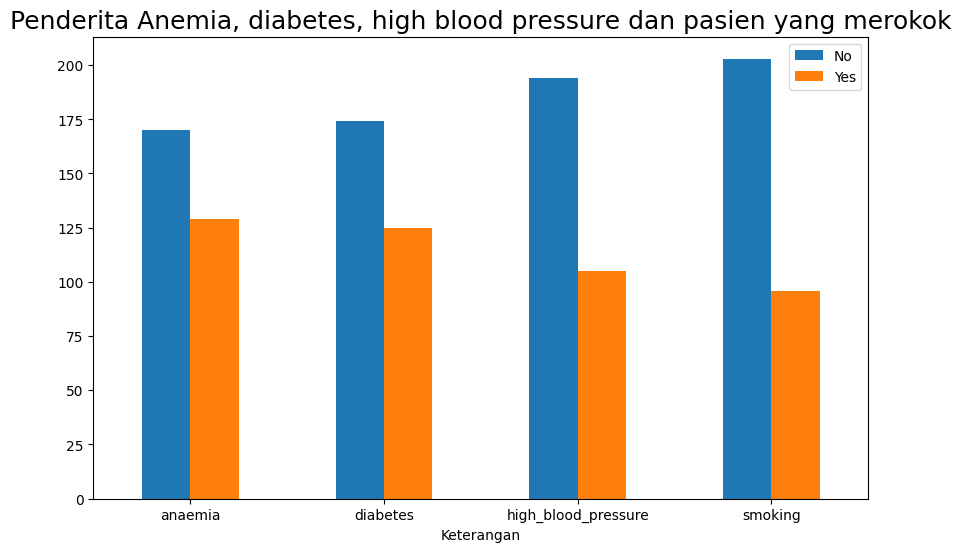

In [ ]:
# Visualisasi jumlah penderita anemia, diabetes, hipertensi
adhs.plot(kind='bar', figsize=(10,6))
plt.title('Penderita Anemia, diabetes, high blood pressure dan pasien yang merokok', fontsize=18)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 0)
plt.show()


Dari hasil Visualisasi barchart diatas, bahwa lebih banyak pasien kardiovaskular yang tidak menderita anemia, diabetes dan hipertensi. Selain itu, pasien kardiovaskular kebanyakan tidak merokok

In [ ]:
# Probablitas kematian pada pasien yang memiliki riwayat penyakit anemia, diabetes, high blood pressure dan yang merokok
df_AH = df.loc[(df['anaemia']==1)  & (df['diabetes']==1) & (df['high_blood_pressure']==1) & (df['smoking']==1)]
death_AH = len(df_AH[df_AH['DEATH_EVENT']==1])
not_death_AH = len(df_AH[df_AH['DEATH_EVENT']==0])
print('Meninggal :',death_AH)
print('Tidak meninggal :', not_death_AH)

Meninggal : 0
Tidak meninggal : 2



Jika dilihat dari hasil output bahwa pasien kardiovaskular yang menderita anemia, diabetes, hipertensi dan sering merokok itu jumlah kematiannya adalah 0. Sehingga dapat ditarik kesimpulan bahwa kematian pada pasien kardiovaskular disebabkan karena penderita anemia, diabetes, hipertensi dan seorang perokok.

In [ ]:
# Probablitas kematian pada pasien yang memiliki riwayat penyakit anemia, diabetes, high blood pressure dan yang merokok
df_AH = df.loc[(df['anaemia']==1)  & (df['diabetes']==1) & (df['high_blood_pressure']==1) & (df['smoking']==0)]
death_AH = len(df_AH[df_AH['DEATH_EVENT']==1])
not_death_AH = len(df_AH[df_AH['DEATH_EVENT']==0])
print('Meninggal :',death_AH)
print('Tidak meninggal :', not_death_AH)

Meninggal : 6
Tidak meninggal : 9


Jika dilihat dari hasil output bahwa pasien kardiovaskular yang menderita anemia, diabetes, hipertensi jumlah kematiannya adalah 6. Sehingga dapat ditarik kesimpulan bahwa kematian pada pasien kardiovaskular bisa disebabkan karena penderita anemia, diabetes, hipertensi, tetapi pasien tersebut tidak merokok

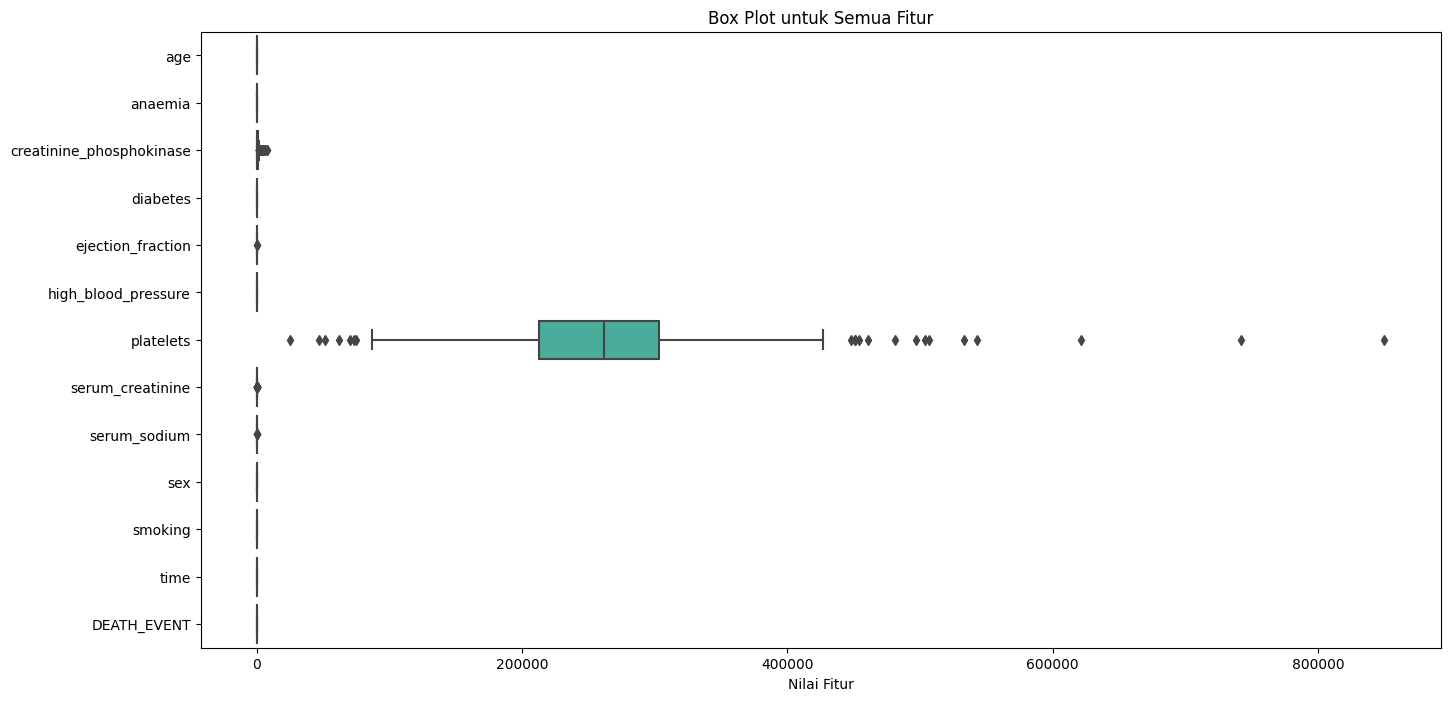

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan seaborn untuk membuat box plot
plt.figure(figsize=(16, 8))  # Mengatur ukuran plot

# Membuat box plot untuk semua fitur
sns.boxplot(data=df, orient="h")  # "h" untuk horizontal, "v" untuk vertical

# Menambahkan judul dan label
plt.title('Box Plot untuk Semua Fitur')
plt.xlabel('Nilai Fitur')

# Menampilkan plot
plt.show()

## Data Preprocessing

### Handling Outlayer

In [ ]:
from sklearn.impute import SimpleImputer

df = pd.DataFrame(df)

# Tentukan batas untuk mendeteksi outlier pada setiap kolom
for kolom in df.columns:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_atas = Q3 + 1.5 * IQR

    # Identifikasi dan imputasi nilai outlier dengan median datanya
    outliers = df[df[kolom] > batas_atas]
    imputer = SimpleImputer(strategy='median')
    df[kolom] = imputer.fit_transform(df[[kolom]])

# Tampilkan DataFrame setelah imputasi
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0      0.0                     582.0       0.0               20.0   
1    55.0      0.0                    7861.0       0.0               38.0   
2    65.0      0.0                     146.0       0.0               20.0   
3    50.0      1.0                     111.0       0.0               20.0   
4    65.0      1.0                     160.0       1.0               20.0   
..    ...      ...                       ...       ...                ...   
294  62.0      0.0                      61.0       1.0               38.0   
295  55.0      0.0                    1820.0       0.0               38.0   
296  45.0      0.0                    2060.0       1.0               60.0   
297  45.0      0.0                    2413.0       0.0               38.0   
298  50.0      0.0                     196.0       0.0               45.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

### Feature Selection

In [ ]:
x_transform = df
print(x_transform.shape)

(299, 13)


In [ ]:
Y=df['DEATH_EVENT']
print(Y.shape)

(299,)


Mencari parameter terbaik dari algoritma random forest classifier menggunakan grid search cv dan mencari fitur terbaik menggunakan sfs

In [ ]:
# Definisikan grid parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'random_state' : [42, 52, 62],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV untuk mencari parameter terbaik untuk RandomForestClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', cv=5)
grid_search_rf.fit(x_transform, Y)

# Menampilkan parameter terbaik untuk RandomForestClassifier
print("Parameter terbaik RandomForestClassifier:", grid_search_rf.best_params_)

# Menggunakan model RandomForestClassifier yang dioptimalkan sebagai estimator untuk SequentialFeatureSelector
sfs = SFS(grid_search_rf.best_estimator_, k_features=10, forward=True, floating=False, scoring='accuracy', cv=5)

# Melatih model menggunakan data latih
sfs.fit(x_transform, Y)

# Menampilkan indeks fitur terpilih
selected_feature_indices = list(sfs.k_feature_idx_)
print("Indeks fitur yang terpilih:", selected_feature_indices)

# Mendapatkan nama fitur yang terpilih
selected_feature_names = list(x_transform.columns[selected_feature_indices])
print("Nama fitur yang terpilih:", selected_feature_names)

Parameter terbaik RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 52}
Indeks fitur yang terpilih: [0, 1, 2, 3, 4, 5, 6, 7, 8, 12]
Nama fitur yang terpilih: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']


Mencari parameter terbaik dari algoritma adaboost classifier menggunakan grid search cv dan mencari fitur terbaik menggunakan sfs

In [ ]:
# Definisikan grid parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'random_state' : [42, 52, 62]
}

# Membuat objek GridSearchCV untuk mencari parameter terbaik untuk AdaBoostClassifier
grid_search_rf = GridSearchCV(AdaBoostClassifier(), param_grid, scoring='accuracy', cv=5)
grid_search_rf.fit(x_transform, Y)

# Menampilkan parameter terbaik untuk AdaBoostClassifier
print("Parameter terbaik AdaBoostClassifier:", grid_search_rf.best_params_)

# Menggunakan model AdaBoostClassifier yang dioptimalkan sebagai estimator untuk SequentialFeatureSelector
sfs = SFS(grid_search_rf.best_estimator_, k_features=10, forward=True, floating=False, scoring='accuracy', cv=5)

# Melatih model menggunakan data latih
sfs.fit(x_transform, Y)

# Menampilkan indeks fitur terpilih
selected_feature_indices = list(sfs.k_feature_idx_)
print("Indeks fitur yang terpilih:", selected_feature_indices)

# Mendapatkan nama fitur yang terpilih
selected_feature_names = list(x_transform.columns[selected_feature_indices])
print("Nama fitur yang terpilih:", selected_feature_names)

Parameter terbaik AdaBoostClassifier: {'n_estimators': 50, 'random_state': 42}
Indeks fitur yang terpilih: [0, 1, 2, 3, 4, 5, 6, 7, 8, 12]
Nama fitur yang terpilih: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']


In [ ]:
X_fit=df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium']]

In [ ]:
X_fit

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0
...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.1,143.0
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0
296,45.0,0.0,2060.0,1.0,60.0,0.0,742000.00,0.8,138.0
297,45.0,0.0,2413.0,0.0,38.0,0.0,140000.00,1.4,140.0


Melakukan pencarian fitur dan parameter terbaik menggunakan GridSearch CV dan sfs agar ketika melatih model mendapatkan nilai yang maksimal, dengan hasil mendapatkan 9 fitur terbaik yaitu  ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium']

### Feature Scaling

In [ ]:
# Teknik Smote digunakan untuk menangani data yang memiliki imbalanced.
from imblearn.over_sampling import SMOTE
smote_method = SMOTE()
X_fit, Y = smote_method.fit_resample(X_fit, Y)

In [ ]:
# Membagi data menjadi Training dan Testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_fit, Y, test_size=0.20, random_state=350)
# Melakukan normalisasi dengan standar scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

Menggunakan algoritma Random Forest Classifier dan AdaBoost Classifier karna memiliki beberapa keuntungan tergantung pada karakteristik data dan tujuan pemodelan. Berikut adalah beberapa alasan memilih algoritma:

### Random Forest Classifier:

1. **Ketangguhan Terhadap Overfitting:**
   - Random Forest memiliki kemampuan alami untuk mengurangi overfitting karena membangun banyak pohon keputusan yang independen dan kemudian menggabungkan hasilnya.

2. **Kemampuan Menangani Fitur yang Banyak atau Irrelevant:**
   - Random Forest cenderung efektif dalam menangani dataset dengan banyak fitur atau fitur yang tidak relevan. Ini dapat secara otomatis melakukan seleksi fitur dengan mengukur pentingnya setiap fitur dalam membagi data.

3. **Fleksibilitas dalam Tipe Data:**
   - Random Forest dapat digunakan baik untuk tugas klasifikasi maupun regresi. Ini membuatnya dapat diaplikasikan pada berbagai jenis masalah.

4. **Skalabilitas Tinggi:**
   - Random Forest dapat dengan baik menangani dataset yang besar dan kompleks. Algoritma ini dapat dijalankan secara paralel, yang membuatnya lebih cepat dalam memproses volume data yang besar.

5. **Stabilitas dan Robustness:**
   - Random Forest memiliki stabilitas yang tinggi terhadap perubahan data dan ketidakpastian, sehingga dapat memberikan hasil yang konsisten.

### AdaBoost Classifier:

1. **Meningkatkan Kinerja pada Data yang Sulit:**
   - AdaBoost bekerja dengan cara memberikan bobot yang lebih besar pada instans yang sulit diprediksi, memaksa model untuk lebih fokus pada kasus-kasus yang paling sulit.

2. **Tidak Memerlukan Penyetelan Parameter yang Rumit:**
   - AdaBoost memiliki sedikit parameter yang perlu disetel, yang membuatnya lebih mudah diimplementasikan dan kurang bergantung pada penyetelan parameter yang kompleks.

3. **Kemampuan untuk Digunakan dengan Berbagai Model Dasar:**
   - AdaBoost dapat diintegrasikan dengan berbagai model dasar (weak learners), seperti pohon keputusan dangkal, memberikan fleksibilitas dalam pilihan model dasar.

4. **Mengurangi Overfitting:**
   - AdaBoost juga memiliki kemampuan untuk mengurangi overfitting, terutama karena memberikan penalti pada instans yang salah diklasifikasikan.

5. **Efektif pada Data Tidak Seimbang:**
   - Dapat digunakan dengan baik pada dataset yang tidak seimbang karena memberikan penekanan lebih pada instans dari kelas minoritas.

Kesimpulannya, pemilihan antara Random Forest dan AdaBoost tergantung pada karakteristik khusus dataset dan tujuan pemodelan. Dalam beberapa kasus, pengujian dan pembandingan kinerja kedua algoritma dapat membantu memilih model yang paling sesuai untuk tugas tertentu.

### Pelatihan Model

Membuat model Random Forest Classifier dan Adaboost Classifier

In [ ]:
model1 = RandomForestClassifier(n_estimators=50, random_state=52)

In [ ]:
model2 = AdaBoostClassifier(n_estimators=50, random_state=42)

### Evaluasi Model

#### Random Forest Classifier

In [ ]:
rf_model = model1.fit(X_train, Y_train)

In [ ]:
predictions_rf = rf_model.predict(X_test)
rf_train_r2 = model1.score(X_train,Y_train)
rf_test_r2 = model1.score(X_test, Y_test)

class_report_test = classification_report(Y_test, predictions_rf)

print('Akurasi (Data Pelatihan) : %.4f' % rf_train_r2)
print('Akurasi (Data Pengujian) : %.4f' % rf_test_r2)
print(f'Laporan Klasifikasi (Data Pengujian):\n{class_report_test}')

Akurasi (Data Pelatihan) : 1.0000
Akurasi (Data Pengujian) : 0.8902
Laporan Klasifikasi (Data Pengujian):
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        48
         1.0       0.84      0.91      0.87        34

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82



In [ ]:
conf_matrix_test =confusion_matrix(Y_test, predictions_rf)
print(f'Matrix Konfusi (Data Pengujian):\n{conf_matrix_test}')

Matrix Konfusi (Data Pengujian):
[[42  6]
 [ 3 31]]


True Negative (TN): 40

Jumlah pasien yang sebenarnya tidak mengalami kegagalan jantung dan berhasil diprediksi dengan benar sebagai bukan kegagalan jantung oleh model.
False Positive (FP): 8

Jumlah pasien yang sebenarnya tidak mengalami kegagalan jantung tetapi salah diprediksi oleh model sebagai mengalami kegagalan jantung.
False Negative (FN): 6

Jumlah pasien yang sebenarnya mengalami kegagalan jantung tetapi salah diprediksi oleh model sebagai tidak mengalami kegagalan jantung.
True Positive (TP): 28

Jumlah pasien yang sebenarnya mengalami kegagalan jantung dan berhasil diprediksi dengan benar oleh model sebagai mengalami kegagalan jantung.

#### AdaBoostClassifier

In [ ]:
ad_model = model2.fit(X_train, Y_train)

In [ ]:
predictions_ad = ad_model.predict(X_test)
ad_train_r2 = model2.score(X_train,Y_train)
ad_test_r2 = model2.score(X_test, Y_test)

class_report_test = classification_report(Y_test, predictions_ad)

print('Akurasi (Data Pelatihan) : %.4f' % ad_train_r2)
print('Akurasi (Data Pengujian) : %.4f' % ad_test_r2)
print(f'Laporan Klasifikasi (Data Pengujian):\n{class_report_test}')

Akurasi (Data Pelatihan) : 0.8580
Akurasi (Data Pengujian) : 0.8537
Laporan Klasifikasi (Data Pengujian):
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        48
         1.0       0.87      0.76      0.81        34

    accuracy                           0.85        82
   macro avg       0.86      0.84      0.85        82
weighted avg       0.85      0.85      0.85        82



In [ ]:
conf_matrix_test = confusion_matrix(Y_test, predictions_ad)
print(f'Matrix Konfusi (Data Pengujian):\n{conf_matrix_test}')

Matrix Konfusi (Data Pengujian):
[[44  4]
 [ 8 26]]


True Negative (TN): 42

Jumlah pasien yang sebenarnya tidak mengalami kegagalan jantung dan berhasil diprediksi dengan benar sebagai bukan kegagalan jantung oleh model.
False Positive (FP): 6

Jumlah pasien yang sebenarnya tidak mengalami kegagalan jantung tetapi salah diprediksi oleh model sebagai mengalami kegagalan jantung.
False Negative (FN): 10

Jumlah pasien yang sebenarnya mengalami kegagalan jantung tetapi salah diprediksi oleh model sebagai tidak mengalami kegagalan jantung.
True Positive (TP): 24

Jumlah pasien yang sebenarnya mengalami kegagalan jantung dan berhasil diprediksi dengan benar oleh model sebagai mengalami kegagalan jantung.

## Model Inference

In [ ]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       406 non-null    float64
 1   anaemia                   406 non-null    float64
 2   creatinine_phosphokinase  406 non-null    float64
 3   diabetes                  406 non-null    float64
 4   ejection_fraction         406 non-null    float64
 5   high_blood_pressure       406 non-null    float64
 6   platelets                 406 non-null    float64
 7   serum_creatinine          406 non-null    float64
 8   serum_sodium              406 non-null    float64
dtypes: float64(9)
memory usage: 28.7 KB


In [ ]:
X_fit.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0
5,90.0,1.0,47.0,0.0,40.0,1.0,204000.00,2.1,132.0
6,75.0,1.0,246.0,0.0,15.0,0.0,127000.00,1.2,137.0
7,60.0,1.0,315.0,1.0,60.0,0.0,454000.00,1.1,131.0
8,65.0,0.0,157.0,0.0,65.0,0.0,263358.03,1.5,138.0
9,80.0,1.0,123.0,0.0,35.0,1.0,388000.00,9.4,133.0


In [ ]:
# Masukan data berdasarkan tabel diatas, sesuaikan inputnya dengan apa yang diminta.

age         = int(input('Umur                           :'))
anaemia     = int(input('Anemia (Tidak=0, Iya=1)        :'))
creatin     = float(input('Creatinine phosphokinase       :'))
diabetes    = int(input('Diabtes (Tidak=0, Iya=1)       :'))
ejectfrac   = float(input('Ejection Fraction              :'))
high_blood  = int(input('High blood preassure (Tidak=0, Iya=1)       :'))
platelets   = float(input('Platelets                      :'))
serum_c     = float(input('Serum creatinine               :'))
serum_s     = int(input('Serum sodium               :'))
metode      = input('Metode Apa yang akan digunakan :')

x_input=[[age, anaemia, creatin, diabetes, ejectfrac, high_blood, platelets, serum_c, serum_s]]
x_input=scaler.fit_transform(x_input)
x_input=x_input.reshape(9, )

if metode == 'Random Forest':
    val_predict = model1.predict([x_input])
elif metode ==  'AdaBoost':
    val_predict = model2.predict([x_input])
else:
    print('ERROR!')

print('')
if val_predict == 0:
    print('Prediksi adalah 0, yang berarti diprediksi tidak meninggal')
elif val_predict == 1:
    print('Prediksi adalah 1, yang berarti diprediksi meninggal')
else:
    print('Error!')

Umur                           :35
Anemia (Tidak=0, Iya=1)        :1
Creatinine phosphokinase       :30
Diabtes (Tidak=0, Iya=1)       :1
Ejection Fraction              :96
High blood preassure (Tidak=0, Iya=1)       :1
Platelets                      :77
Serum creatinine               :77
Serum sodium               :89
Metode Apa yang akan digunakan :Random Forest

Prediksi adalah 1, yang berarti diprediksi meninggal


## Kesimpulan

Berdasarkan hasil analalisis keseluruhan, dapat ditarik kesimpulan bahwa:

1. Jumlah pasien yang meninggal akibat penyakit jantung yaitu sebesar 67.89%
2. Lebih banyak pasien pengidap penyakit jantung yang mengalami kematian ketika melakukan follow up sebelum kurun waktu 100 hari
2. Untuk data feature, kami melakukan selected feature menggunakan sfs dan GridSearch CV untuk mencari fitur terbaik sehingga kita mendapatkan 9 fitur terbaik yang selanjutnya kami lakukan pemodelan pda fitur tersebut. fitur nya sebagai berikut : ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium']
4. Karena data yang kami gunakan termasuk kedalam imbalanced data, selanjutnya kami menerapkan Teknik SMOTE untuk menghandling atau memperbaiki imbalanced data tersebut
5. Terdapat perbedaan yg siginifikan pada performansi model ensamble ketika sebelum dilakukan Teknik SMOTE dan Sesudahnya.
6. Rata-rata setiap model memiliki performansi yang cukup baik ketika telah diterapkan teknik SMOTE, terutama pada nilai akurasi dan presisi
7. Berikut adalah penjabaran performansi dari setiap model yang digunakan:
* Random Forest:
Akurasi (Data Pelatihan) : 1.0000
Akurasi (Data Pengujian) : 0.8293
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.78      0.82      0.80        34

    accuracy                           0.83        82
   macro avg       0.82      0.83      0.83        82
weighted avg       0.83      0.83      0.83        82

* AdaBoost Classifier:
Nilai akurasi Model : 0.96
Akurasi (Data Pelatihan) : 0.8364
Akurasi (Data Pengujian) : 0.8049
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.80      0.71      0.75        34

    accuracy                           0.80        82
   macro avg       0.80      0.79      0.80        82
weighted avg       0.80      0.80      0.80        82

### Save Model

In [ ]:
pickle.dump(rf_model, open('model_rf.pkl', "wb"))

In [ ]:
pickle.dump(ad_model, open('model_ad.pkl', "wb"))